In [18]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [59]:
#import main packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import scikitplot as skplt
from tabulate import tabulate

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [21]:
from collections import Counter
import pprint
import pickle

In [38]:
#import machine learning models
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

#metrics
from sklearn.metrics import mean_squared_error

#create an list with all models

models = []
models.append(("LR", LinearRegression()))
models.append(("SVR", SVR(kernel="rbf")))
models.append(("DT", DecisionTreeRegressor()))
models.append(("RF", RandomForestRegressor(random_state=0)))
models.append(("LS", linear_model.Lasso(alpha=0.1)))

In [67]:
#function to run the models
def run_models(models, X, y):
    
    #split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'r2'
    for name, model in models:
        #if polynomial regression, fix dataset first
        kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle = True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(name, "results")
        fit_model = model.fit(X_train, y_train)
        y_preds = fit_model.predict(X_test)
        print(tabulate([['R2 mean ', cv_results.mean()],
                        ['R2 std ', cv_results.std()],
                        ['MSE: ', mean_squared_error(y_test, y_preds)],
                        ['RMSE: ', np.sqrt(mean_squared_error(y_test, y_preds))]], 
                       headers=['Metrics', 'Results'], tablefmt='orgtbl'))
        
        print()
        print("="*100)
        print()
        
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [24]:
#import the dataset
dataset = pd.read_csv("../data/dataset_clean.csv")

In [25]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,Cluster,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.216872,0.762019,-0.047855,0.539395,-0.157840,-0.013103,-0.055251,3.590072,2.551217,0.971195,-1.559601,-0.012339,-1.172573,1.134053,-0.688902,-0.014411,-0.350532,-0.388418
1,-1.091885,1.295332,-0.759107,-0.892554,-1.024033,-0.936942,-1.018838,0.032075,-0.980863,0.329909,-0.995187,0.008612,-1.172573,-0.881793,1.451584,-0.014411,-0.350532,-0.388418
2,-1.326861,1.009963,1.690758,-0.409003,-0.141273,-0.243414,-0.224074,-0.854523,-0.722609,-0.468782,1.082074,-0.027683,-1.172573,-0.881793,-0.688902,-0.014411,2.852809,-0.388418
3,0.817914,-0.730322,0.505340,-0.113854,-0.290372,-0.081504,-0.216282,0.527654,-0.164365,0.112202,-0.675896,0.008913,0.852933,1.134053,-0.688902,-0.014411,-0.350532,-0.388418
4,1.232870,-1.347842,-0.601051,-0.190036,0.142724,-0.298827,0.082404,-0.849036,-0.698262,-0.480599,0.988246,-0.090435,0.852933,-0.881793,-0.688902,-0.014411,-0.350532,2.574548


In [29]:
dataset.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
rooms_per_household           0
bedrooms_per_room             0
population_per_household      0
Cluster                       0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [36]:
X, y = dataset.drop('median_house_value', axis = 1), dataset['median_house_value']

LR results
| Metrics   |   Results |
|-----------+-----------|
| R2 mean   | 0.647129  |
| R2 std    | 0.0222948 |
| MSE:      | 0.350601  |
| RMSE:     | 0.592115  |


SVR results
| Metrics   |   Results |
|-----------+-----------|
| R2 mean   | 0.751192  |
| R2 std    | 0.0121836 |
| MSE:      | 0.251296  |
| RMSE:     | 0.501295  |


DT results
| Metrics   |   Results |
|-----------+-----------|
| R2 mean   | 0.607888  |
| R2 std    | 0.0378907 |
| MSE:      | 0.37545   |
| RMSE:     | 0.61274   |


RF results
| Metrics   |   Results |
|-----------+-----------|
| R2 mean   | 0.805376  |
| R2 std    | 0.0121344 |
| MSE:      | 0.200933  |
| RMSE:     | 0.448256  |


LS results
| Metrics   |   Results |
|-----------+-----------|
| R2 mean   | 0.568478  |
| R2 std    | 0.0153562 |
| MSE:      | 0.437827  |
| RMSE:     | 0.661685  |




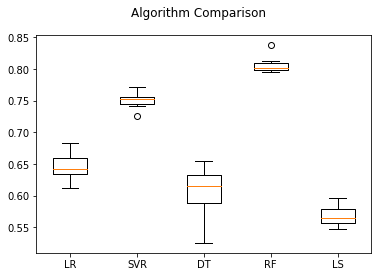

In [68]:
#run models
run_models(models, X, y)